In [33]:
from IntelArch import get_model
import torch


model = get_model()
model.eval()

IntelModel(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.2, inplace=False)
    (10): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1))
    (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.2, inplace=False)
    (15): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
    (16): BatchNorm2d(1024, e

In [34]:
from torchvision import transforms
import PIL

normalize_mean = [0.485, 0.456, 0.406]
normalize_std = [0.229, 0.224, 0.225]
img_arr = PIL.Image.open('v.jpg')
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=normalize_mean,std=normalize_std)
])

input_tensor = transform(img_arr)

In [35]:
input_tensor=input_tensor.unsqueeze(0)

In [36]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [37]:
result = model(input_tensor)

In [38]:
int_to_classes = ["glacier",
"sea",
"street",
"forest",
"buildings",
"mountain"]

In [39]:
int_to_classes[result.argmax(dim=-1)]

'glacier'

In [60]:
first_layer = model.features[0]
first_conv = first_layer(input_tensor)


In [72]:
import matplotlib.pyplot as plt
import math

num_channels = first_conv.shape[1]
cols = 8
rows = math.ceil(num_channels / cols)
rows

8

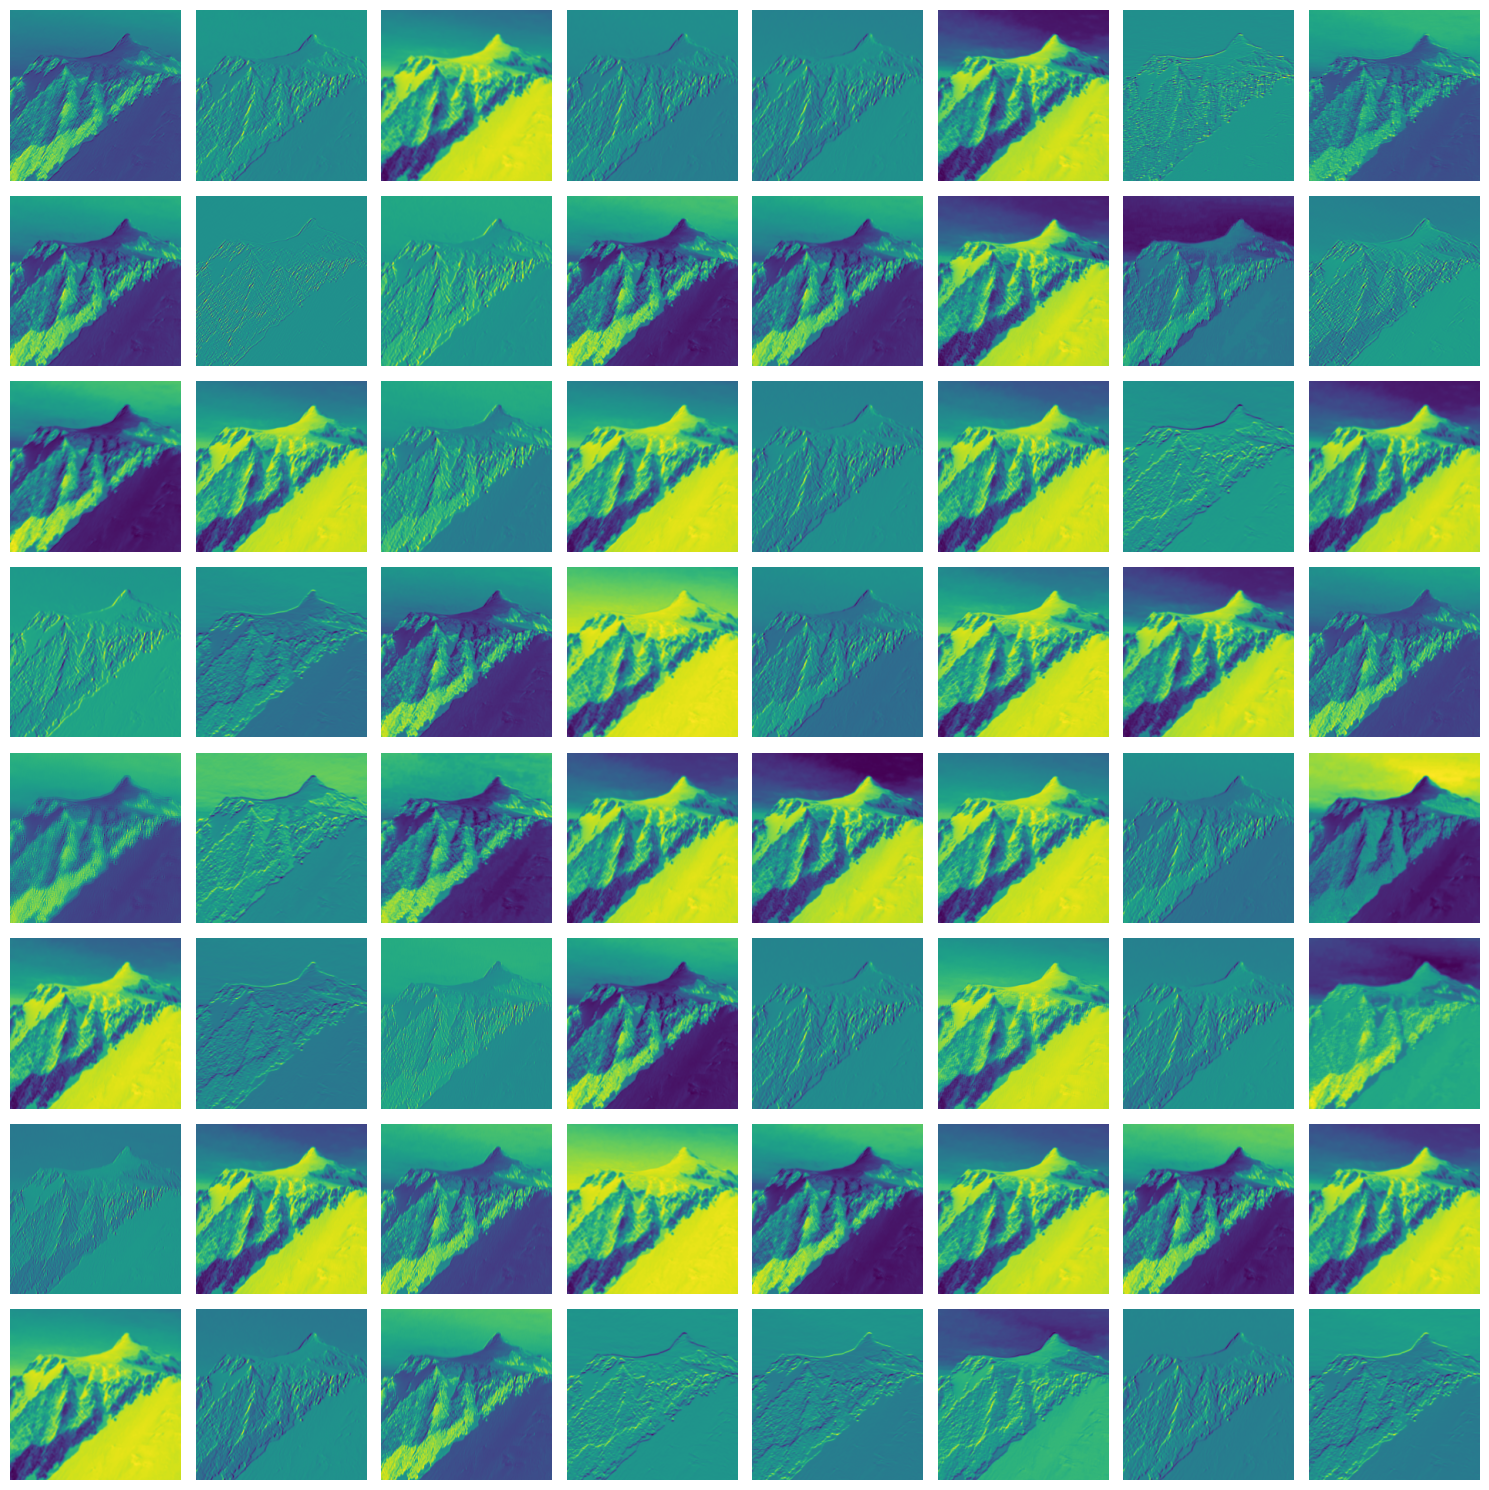

In [73]:
plt.figure(figsize=(15, 15))
for i in range(num_channels):
    plt.subplot(rows, cols, i+1)
    feat = first_conv[0, i].detach().cpu()
    feat = (feat - feat.min()) / (feat.max() - feat.min()) 
    plt.imshow(feat,)
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
import torch

# Suppose img_norm has shape (3,H,W)
mean = torch.tensor([0.485,0.456,0.406]).view(3,1,1)
std  = torch.tensor([0.229,0.224,0.225]).view(3,1,1)

img_unnorm = first_img_tensor * std + mean



In [54]:
import numpy as np
img_arr = img_unnorm.detach().numpy()

In [59]:
import cv2 
cv2.imshow(img_arr)

error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [ ]:
img_arr